# IMDB

In [13]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [14]:
from fastai.text import *

## Preparing the classifier

In [15]:
path = Path('/data/toxic/')

In [29]:
data_lm = TextLMDataBunch.load(path,'toxic_lm',bs=bs)


In [30]:
data_lm.show_batch()

idx,text
0,"xxmaj it is considered vandalism . xxmaj if you would like to experiment , use the sandbox . xxmaj thank you . - xxbos = = xxmaj on edit warring and xxup pov = = \n\n xxmaj someone pointed out this ' edit war ' on my talk page , and i 've been avoiding it . xxmaj but i took a look today and it seems pretty simple"
1,"xxmaj signpost \n { | align=""""center "" "" cellspacing=""""20 "" "" width=90 % style=""""background - color : transparent ; "" "" \n | width=50 % | xxmaj arbitration xxmaj committee elections open \n | width=50 % | xxmaj the xxmaj seigenthaler incident : xxmaj one year later \n |- \n | width=50 % | xxmaj wikimedia celebrates xxmaj commons milestone , plans fundraiser \n | width=50 % | xxmaj wikipedia"
2,"or can you do it as an administrator , so that the history moves with it ? xxmaj there was a revert move xxunk , but i do n't see it anymore . i am trying to create redirects from full names and vice versa , and find missing middle names for people . xxbos : xxmaj hi ! xxmaj many thanks this would be great . i have also"
3,"will be more likely to associate the island with xxmaj europe rather than with xxmaj asia , so this was the reason for sorting the stub templates the way i did . xxmaj originally , we just used for all articles , but the material became so big that we broke it up by continent . i suspect that a stub template for xxmaj middle xxmaj east politicians will eventually"
4,": xxunk \n i have tagged xxmaj image : xxunk as , because it does not provide a fair use rationale . xxmaj if you believe the image to be acceptable for fair use according to xxmaj wikipedia policy , please provide a rationale explaining as much , in accordance with the fair use rationale guideline , on the image description page . xxmaj please also consider using or"


Next time we launch this notebook, we can skip the cell above that took a bit of time (and that will take a lot more when you get to the full dataset) and load those results like this:

## Classifier

Now, we'll create a new data object that only grabs the labelled data and keeps those labels. Again, this line takes a bit of time.

In [31]:
data_cls = TextDataBunch.from_csv(path,'train_labeled2.csv',text_cols=['comment_text'],label_cols=['label'],label_delim=' ',vocab=data_lm.vocab)


In [32]:
bs = 48

In [33]:
data_cls.show_batch()

text,target
xxbos xxmaj take that ! \n\n xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the,obscene;severe_toxic;toxic
xxbos xxup you xxup fucking xxup kike ! xxup don't xxup edit xxup things xxup you xxup have xxup no xxup idea xxup about ! xxup give xxup credit xxup where xxup it xxup 's xxup due ! xxup you xxup fucking xxup kike ! xxup don't xxup edit xxup things xxup you xxup have xxup no xxup idea xxup about ! xxup give xxup credit xxup where xxup it,insult;obscene;severe_toxic;toxic
"xxbos "" xxmaj the following entries have been removed from the xxmaj dungeons & xxmaj dragons in popular culture article . xxmaj the reason is that they are trivial or minor references , and may not have a reliable source available . xxmaj if you want to restore these to the main article , please discuss on the talk page first . \n\n xxmaj comics \n xxmaj xxunk",okay
"xxbos "" . xxmaj if you want to talk about linguistic issues in the xxmaj spanish xxmaj state , or about terrorist bands linked to nationalism , do so at their right articles . xxmaj the way you try to shove those topics in an article about "" "" xxmaj nationalities in xxmaj spain xxrep 4 "" looks like you´re trying to inject your personal , xxunk to those xxunk",okay
"xxbos "" \n\n novaseminary pov pushing , and section blanking . xxmaj so everyone is aware of his pov editing , i have copied some of his history here . i ask other editors not to restore his versions as they are pov and section blanking . \n xxmaj here is a little histoy on xxunk . xxmaj more can easily be found . i include it here to",okay


We can then create a model to classify those reviews and load the encoder we saved before.

In [34]:
learn = text_classifier_learner(data_cls, drop_mult=0.5)
learn.load_encoder('toxic_lm_finetuned_enc')
learn.freeze()

In [35]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


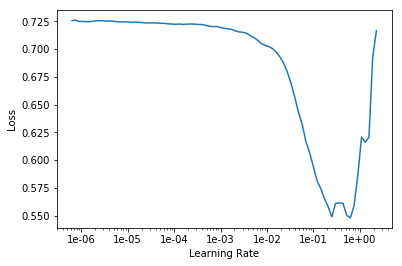

In [36]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss


In [59]:
learn.save('fine_tuned_test_cls_1')

In [ ]:
learn.load('fine_tuned_test_cls_1');

In [60]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.308999,0.202802,0.922640


In [61]:
learn.save('fine_tuned_test_cls_2')

In [62]:
learn.load('fine_tuned_test_cls_2');

In [63]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy


RuntimeError: CUDA out of memory. Tried to allocate 51.00 MiB (GPU 0; 5.93 GiB total capacity; 4.73 GiB already allocated; 30.12 MiB free; 345.27 MiB cached)

In [ ]:
learn.save('third')

In [ ]:
learn.load('third');

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.240424,0.155204,0.943160
2,0.217462,0.153421,0.943960


In [ ]:
learn.predict("I really loved that movie, it was awesome!")

(Category pos, tensor(1), tensor([7.5928e-04, 9.9924e-01]))